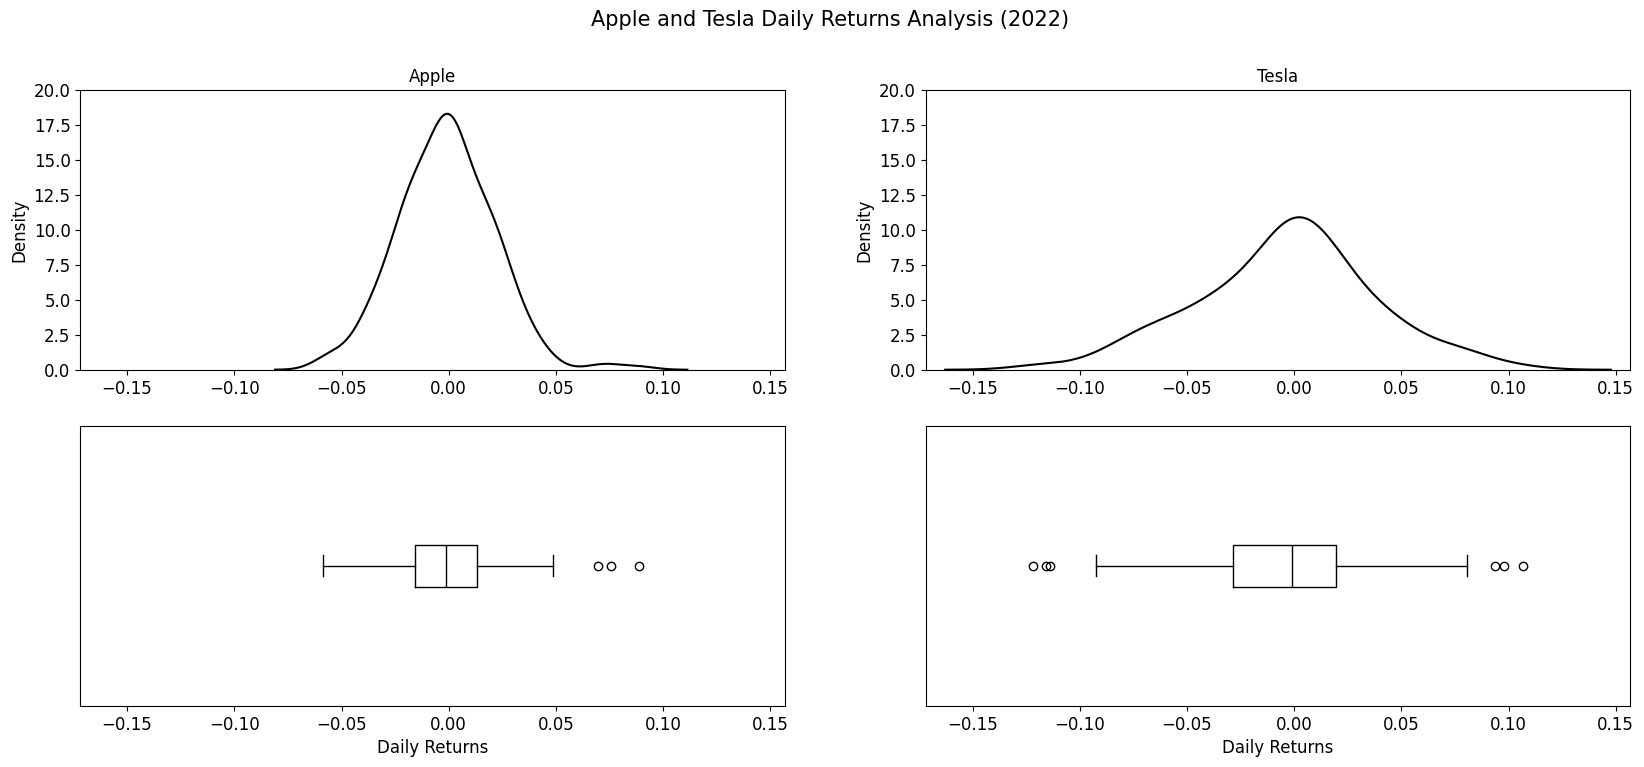

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas as pd
import matplotlib.font_manager as fm
from matplotlib import rcParams

# Set the font
font = 'sans-serif'  
rcParams['font.family'] = font
rcParams['font.size'] = 12

# Download historical data for AAPL and TSLA
aapl = yf.download('AAPL', start='2022-01-01', end='2023-01-01', progress= False)
tsla = yf.download('TSLA', start='2022-01-01', end='2023-01-01', progress= False)

# Calculate daily returns
aapl['Daily Return'] = aapl['Adj Close'].pct_change()
tsla['Daily Return'] = tsla['Adj Close'].pct_change()

# Combine data into a single DataFrame
combined_data = pd.DataFrame({'AAPL': aapl['Daily Return'], 'TSLA': tsla['Daily Return']})

# Determine the common x-axis limits
min_return = combined_data.min().min()
max_return = combined_data.max().max()

# Setting up the subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 8))  # Increased figure size for better layout

# AAPL Density Plot
sns.kdeplot(combined_data['AAPL'].dropna(), color='black', ax=axs[0, 0])
axs[0, 0].set_title('Apple', color='black', fontsize = 12)
axs[0, 0].set_xlabel('', color='black')
axs[0, 0].set_ylabel('Density', color='black')
axs[0, 0].set_xlim(min_return -0.05 , max_return + 0.05)
axs[0, 0].set_ylim(0, 20)

# TSLA Density Plot
sns.kdeplot(combined_data['TSLA'].dropna(), color='black', ax=axs[0, 1])
axs[0, 1].set_title('Tesla', color='black', fontsize = 12)
axs[0, 1].set_xlabel('', color='black')
axs[0, 1].set_ylabel('Density', color='black')
axs[0, 1].set_xlim(min_return -0.05 , max_return + 0.05)
axs[0, 1].set_ylim(0, 20)

# Box plot customizations
boxplot_customizations = {'medianprops': {'color': 'black'}}

# AAPL Box Plot - Horizontal
axs[1, 0].boxplot(combined_data['AAPL'].dropna(), vert=False, **boxplot_customizations)
axs[1, 0].set_xlabel('Daily Returns', color='black')
axs[1, 0].set_xlim(min_return -0.05 , max_return + 0.05)
axs[1, 0].set_yticks([])

# TSLA Box Plot - Horizontal
axs[1, 1].boxplot(combined_data['TSLA'].dropna(), vert=False, **boxplot_customizations)
axs[1, 1].set_xlabel('Daily Returns', color='black')
axs[1, 1].set_xlim(min_return -0.05 , max_return + 0.05)
axs[1, 1].set_yticks([])

# Add a title for the entire plot
fig.suptitle('Apple and Tesla Daily Returns Analysis (2022)', fontsize=15, color='black')

# Show the plot
plt.show()
